# Chapter 1

## References
- **Pivot**: https://www.youtube.com/watch?v=xPPs59pn6qU
- **Merge**: https://www.youtube.com/watch?v=h4hOPGo4UVU

In [5]:
%matplotlib inline

In [27]:
import warnings
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn.linear_model
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [28]:
np.random.seed(42)

## Data Loading

In [72]:
DATAPATH = Path('./datasets/lifesat/')
GDP_LABEL = 'GDP per capita'
LIFE_SAT_LABEL = 'Life satisfaction'

In [73]:
oecd_bli = pd.read_csv(DATAPATH / "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(DATAPATH / "gdp_per_capita.csv", encoding='latin1', thousands=',',delimiter='\t', na_values="n/a")

In [74]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [75]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [76]:
def prepare_stats(oecd_bli:pd.DataFrame, gdp_per_capita: pd.DataFrame):
    
    oecd_bli = oecd_bli[oecd_bli['INEQUALITY']=='TOT']
    oecd_bli = oecd_bli.pivot(index='Country', columns='Indicator', values="Value")
    
    gdp_per_capita.rename(columns={'2015': GDP_LABEL}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
    full_country_stats.sort_values(by=GDP_LABEL, inplace=True)
    
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[[GDP_LABEL, LIFE_SAT_LABEL]].iloc[keep_indices]

## Visualization

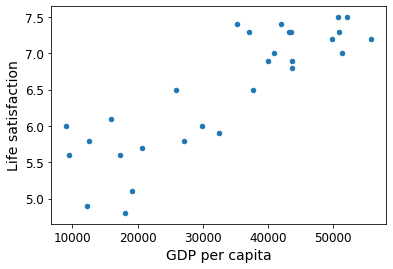

In [77]:
country_stats = prepare_stats(oecd_bli, gdp_per_capita)

country_stats.plot(kind="scatter", x=GDP_LABEL, y=LIFE_SAT_LABEL)
plt.show()

## Model development

In [78]:
X = np.c_[country_stats[GDP_LABEL]]
y = np.c_[country_stats[LIFE_SAT_LABEL]]

model = sklearn.linear_model.LinearRegression()
model.fit(X,y)

X_new = [[22587]]
model.predict(X_new)

array([[5.96242338]])